In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm=LinearRegression()
lm

LinearRegression()

In [6]:
X=df[['highway-mpg']]
Y=df['price']

In [7]:
lm.fit(X,Y)

LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
lm.intercept_

38423.305858157386

In [10]:
lm.coef_

array([-821.73337832])

In [12]:
lm1=LinearRegression()
lm1

LinearRegression()

In [13]:
lm1.fit(df[['engine-size']],df[['price']])
lm1

LinearRegression()

In [14]:
lm1.coef_

array([[166.86001569]])

In [15]:
lm1.intercept_

array([-7963.33890628])

In [16]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [17]:
lm.fit(Z,df['price'])

LinearRegression()

In [18]:
lm.intercept_

-15806.624626329198

In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [20]:
lm2=LinearRegression()

In [21]:
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

In [22]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [23]:
lm2.intercept_

38201.31327245728

In [24]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [ ]:
# model Evaluation using visualization

In [25]:
import seaborn as sns
%matplotlib inline

In [26]:
width = 12
height =10

In [27]:
plt.figure(figsize=(width,height))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

(0.0, 48165.6926085034)

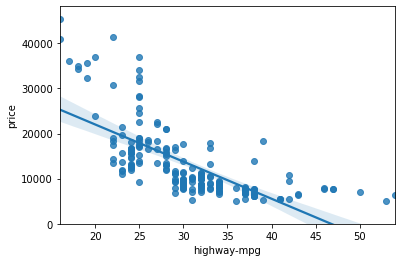

In [32]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 48181.71667102147)

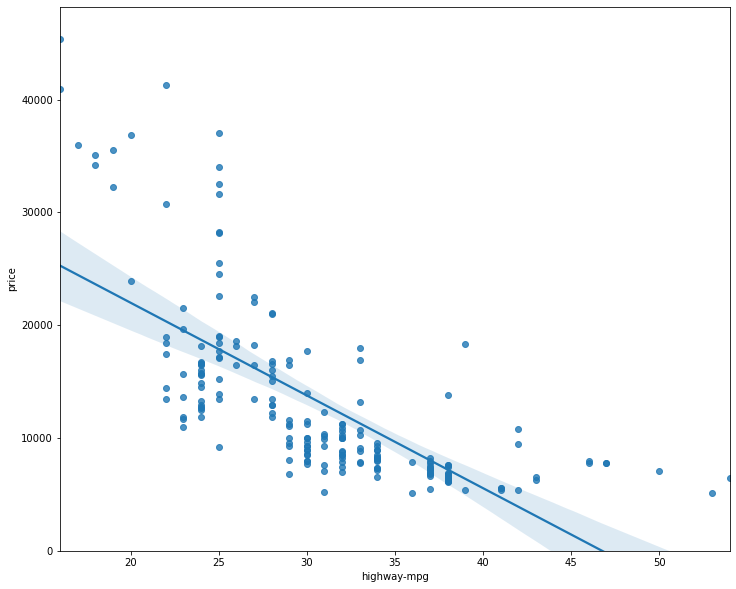

In [35]:
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

In [36]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


C:\Users\henil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


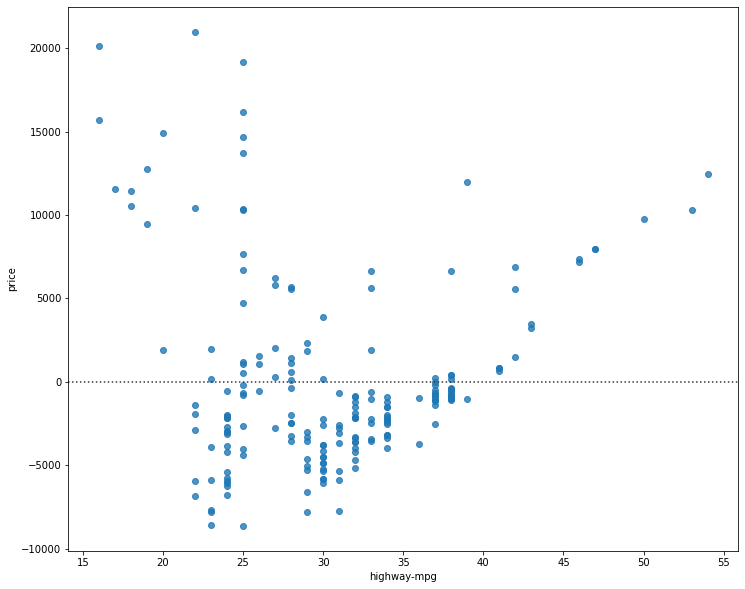

In [37]:
#residual plot
width=12
height=10

plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

In [39]:
Y_hat=lm.predict(Z)

C:\Users\henil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\henil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


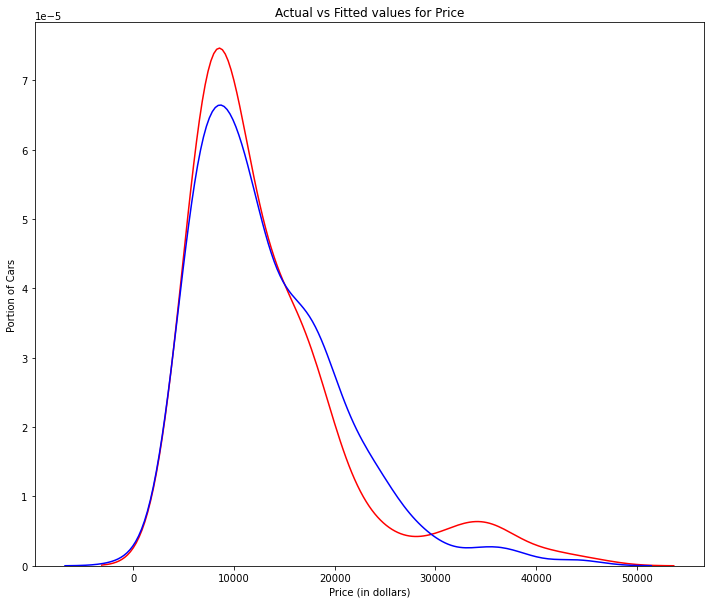

In [45]:
plt.figure(figsize=(width, height))
ax1=sns.distplot(df['price'],hist=False,color="r",label='Actual Value')
sns.distplot(Y_hat, hist=False, color="b",label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Portion of Cars')

plt.show()
plt.close()

In [46]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [47]:
x = df['highway-mpg']
y = df['price']

In [48]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


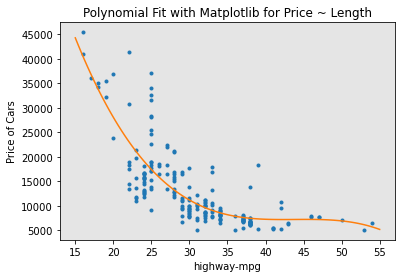

In [49]:
PlotPolly(p, x, y, 'highway-mpg')

In [50]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])